In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
import numpy as np
import pandas as pd

In [2]:
# GROUP: OCELOT
# CSM 185

In [3]:
sim_staticV1 = pd.read_csv("Static_Data_ICU_var1.csv")
sim_staticV2 = pd.read_csv("Static_Data_ICU_var2.csv") 

# var2 dataset has higher variance in simulated values, so we would expect worse model performance

sim_staticV1.head()

,Unnamed: 0,ICU,Age,Sex,Survival Probability,Score,Kidney,Blood,Cholesterol,Immune,...,O2,HR,BP,RBC,LDL,HDL,Platelet,WBC,INR,Death
0,1,1,52,M,0.766291,0.781516,0.787664,0.832123,0.796536,0.791831,...,97.888907,70.595842,72.302804,4.528620,154.345895,82.816898,366460.717948,9694.497647,4.349166,0
1,2,1,63,M,0.618678,0.546628,0.652625,0.607587,0.720491,0.608628,...,95.967047,60.577436,97.691024,4.029332,156.811212,88.671451,442067.274025,9837.802775,5.352092,0
2,3,1,73,F,0.756719,0.694440,0.773898,0.711529,0.759109,0.763613,...,96.243915,64.369572,62.016562,4.475886,129.060571,44.629620,380889.982675,10092.940455,5.746028,0
3,4,1,69,M,0.550172,0.515593,0.539124,0.530283,0.573908,0.529306,...,95.694021,60.924825,63.594397,6.001980,157.810511,37.602695,399104.588757,4152.588614,7.720234,1
4,5,1,88,F,0.526302,0.570185,0.570456,0.508213,0.564809,0.575929,...,95.619407,96.888998,61.640907,4.349459,161.328371,34.751289,461508.072125,4470.457842,6.874477,0


In [4]:
# Clean data in preparation:
sim_staticV1 = sim_staticV1.drop(columns=["Unnamed: 0", "CHM"])
sim_staticV1 = sim_staticV1.replace(["M", "F"], [0,1])

sim_staticV2 = sim_staticV2.drop(columns=["Unnamed: 0", "CHM"])
sim_staticV2 = sim_staticV2.replace(["M", "F"], [0,1])

sim_staticV1.head()

,ICU,Age,Sex,Survival Probability,Score,Kidney,Blood,Cholesterol,Immune,ApacheII,...,O2,HR,BP,RBC,LDL,HDL,Platelet,WBC,INR,Death
0,1,52,0,0.766291,0.781516,0.787664,0.832123,0.796536,0.791831,18.265559,...,97.888907,70.595842,72.302804,4.528620,154.345895,82.816898,366460.717948,9694.497647,4.349166,0
1,1,63,0,0.618678,0.546628,0.652625,0.607587,0.720491,0.608628,32.186435,...,95.967047,60.577436,97.691024,4.029332,156.811212,88.671451,442067.274025,9837.802775,5.352092,0
2,1,73,1,0.756719,0.694440,0.773898,0.711529,0.759109,0.763613,27.516390,...,96.243915,64.369572,62.016562,4.475886,129.060571,44.629620,380889.982675,10092.940455,5.746028,0
3,1,69,0,0.550172,0.515593,0.539124,0.530283,0.573908,0.529306,30.671936,...,95.694021,60.924825,63.594397,6.001980,157.810511,37.602695,399104.588757,4152.588614,7.720234,1
4,1,88,1,0.526302,0.570185,0.570456,0.508213,0.564809,0.575929,29.944591,...,95.619407,96.888998,61.640907,4.349459,161.328371,34.751289,461508.072125,4470.457842,6.874477,0


In [42]:
sim_staticV1.isna().sum() # no null values (because data is simulated)

ICU                     0
Age                     0
Sex                     0
Survival Probability    0
Score                   0
Kidney                  0
Blood                   0
Cholesterol             0
Immune                  0
ApacheII                0
Urine Volume            0
Creatinine              0
Urea                    0
O2                      0
HR                      0
BP                      0
RBC                     0
LDL                     0
HDL                     0
Platelet                0
WBC                     0
INR                     0
Death                   0
dtype: int64

In [20]:
# Goal: predict death tag based on data
x_train1, x_test1, y_train1, y_test1 = train_test_split(sim_staticV1.drop(["ICU","Death","Survival Probability"], axis = "columns"), sim_staticV1["Death"], test_size = 0.25)

x_train2, x_test2, y_train2, y_test2 = train_test_split(sim_staticV2.drop(["ICU","Death","Survival Probability"], axis = "columns"), sim_staticV2["Death"], test_size = 0.25)

# creating train/test cohorts for model creation

In [21]:
len(x_train1) # 750 elements
model_staticV1 = RandomForestClassifier(n_estimators = 100)
model_staticV1.fit(x_train1, y_train1)

model_staticV2 = RandomForestClassifier(n_estimators = 100)
model_staticV2.fit(x_train2, y_train2)

# each random forest classifier will consist of 100 individual decision trees

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
model_staticV1.score(x_test1, y_test1) # model 1 score

0.652

In [23]:
model_staticV2.score(x_test2, y_test2) # model 2 score

0.732

In [24]:
y_predicted1 = model_staticV1.predict(x_test1)

In [25]:
y_predicted2 = model_staticV2.predict(x_test2)

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# for visualizations

In [27]:
cm_staticV1 = confusion_matrix(y_test1, y_predicted1)
cm_staticV2 = confusion_matrix(y_test2, y_predicted2)

Text(69.0, 0.5, 'Truth')

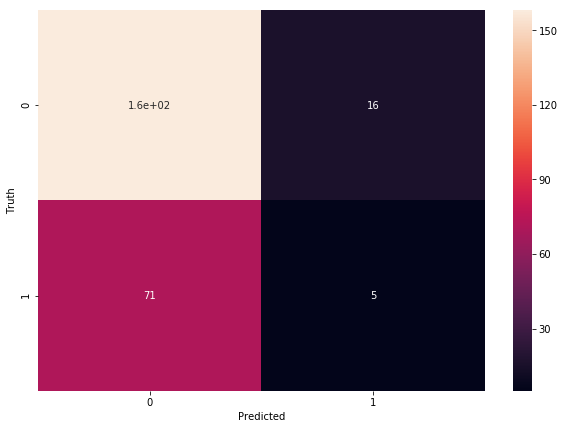

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm_staticV1, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# confusion matrix for v1

Text(69.0, 0.5, 'Truth')

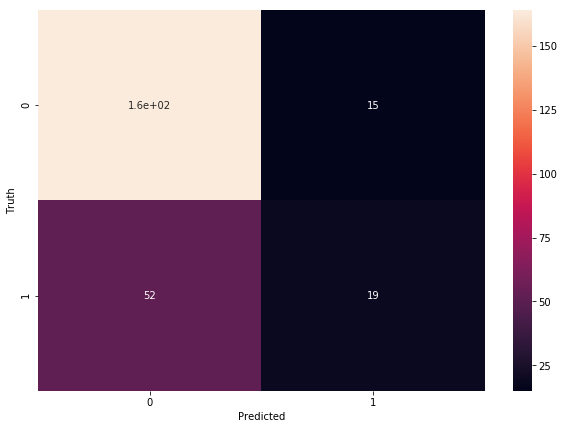

In [29]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_staticV2, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# confusion matrix for v2

In [30]:
roc_auc_score(np.array(y_test1), np.array(y_predicted1)) 

0.48691772534785244

In [31]:
roc_auc_score(np.array(y_test2), np.array(y_predicted2)) 

0.5919033755606263

In [32]:
roc_curve(y_test1, y_predicted1)

(array([0.        , 0.09195402, 1.        ]),
 array([0.        , 0.06578947, 1.        ]),
 array([2, 1, 0]))

In [33]:
roc_curve(y_test2, y_predicted2)

(array([0.        , 0.08379888, 1.        ]),
 array([0.        , 0.26760563, 1.        ]),
 array([2, 1, 0]))

In [34]:
fpr1, tpr1, threshold1 = roc_curve(y_test1, y_predicted1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, threshold2 = roc_curve(y_test2, y_predicted2)
roc_auc2 = auc(fpr2, tpr2)

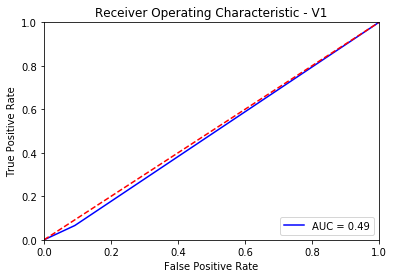

In [35]:
plt.title('Receiver Operating Characteristic - V1')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ROC Curve for v1

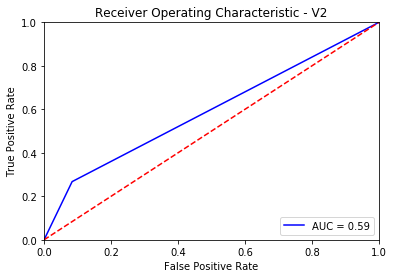

In [37]:
plt.title('Receiver Operating Characteristic - V2')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ROC Curve for v2